In [91]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


# Exploratory Data Analysis

In [92]:
logins = pd.read_json('data/logins.json')
logins = logins.set_index('login_time')

In [93]:
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [94]:
logins.shape

(93142, 0)

In [95]:
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
logins['visit']= 1
login_count = logins.resample('15T').count()

In [116]:
login_count.head()

,visit
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Riders Analysis can be done bsed on Daily , weekly and monthly basis


**One Day Plot** 

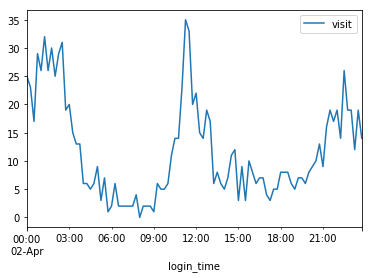

In [96]:
login_count['1970-04-02'].plot()
plt.show()

**Obervation**

Based on graph above we do see some patern emerging during mid noon and mid-night , but will need to see by averaging on everyday avaible

**One Week Plot**

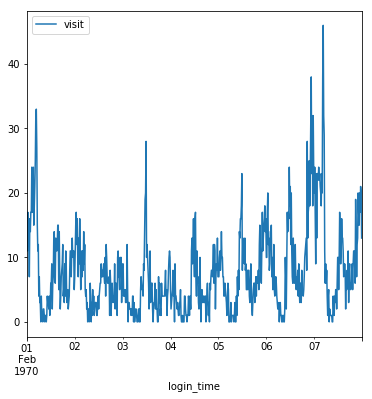

In [97]:
login_count['1970-02-01':'1970-02-07'].plot(figsize=(6, 6))
plt.show()

**Observations**

Based on graph above there can be a pattern emerging on weekly basis

### **As observed above we need to average by daily and weekly basis**

**Average Daily Plot**

In [98]:
daily_count = logins.resample('D').count()
daily_count['day'] = daily_count.index.weekday

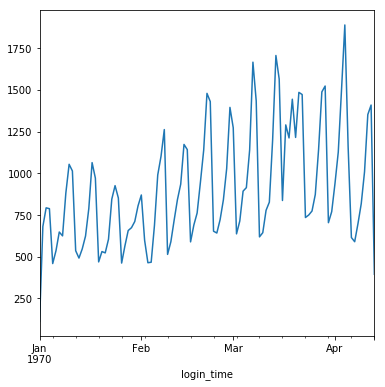

In [99]:
daily_count['visit'].plot(figsize=(6, 6))
plt.show()

**Average Weekday Plot**

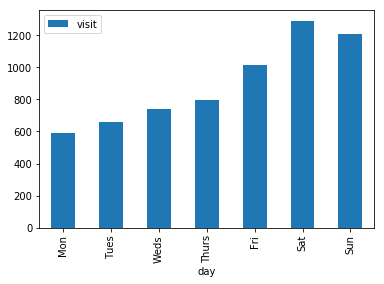

In [100]:
daily_count.groupby('day').mean().plot(kind='bar')
plt.xticks(range(7), ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

There is clearly more traffic during weekends

**Average hourly Plot**

In [101]:
hour_count = logins.resample('H').count()
hour_count['hour'] = hour_count.index.hour
hour_count['day'] = hour_count.index.weekday.map(day_dict)

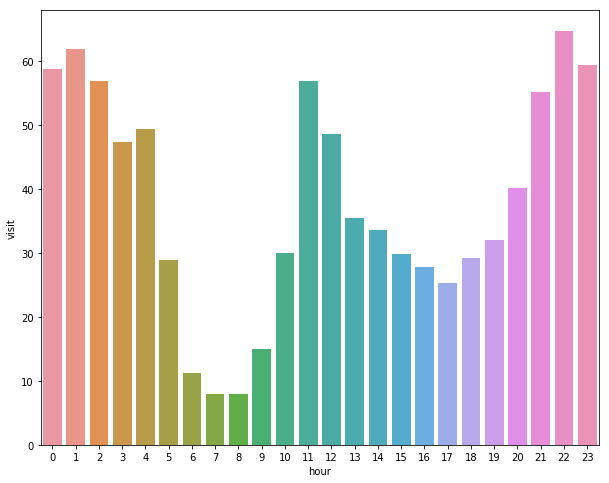

In [115]:
hour_groupby = hour_count.groupby('hour').mean().reset_index()
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
#hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=hour_groupby, x='hour', y='visit', ax=axes)
plt.show()

As observed above we have higest traffic at noon and late night

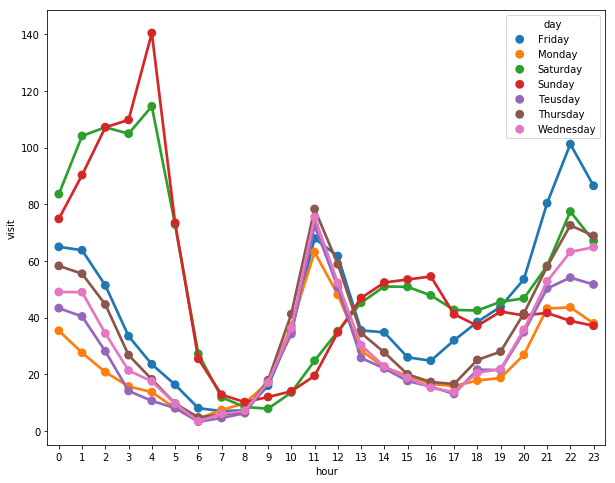

In [103]:
hour_groupby = hour_count.groupby(['hour', 'day']).mean().reset_index()
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
#hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(data=hour_groupby, x='hour', y='visit', hue='day' ,ax=axes)
plt.show()

**Observations**

There is two main patterns observed one is for weekends and other is for weekdays
* During weekend more visitors are observed during late night and early morning
* During weekdays more visitors are observed during noon and close midnight

overall visitors are are high on Friday, Saturday and Sunday
